# Data Collection Notebook
## Objectives
Fetch data from Kaggle and save it as raw data.
Inspect the data and save it under outputs/datasets/collection
## Inputs
Kaggle JSON file - the authentication token.
## Outputs
Generate Dataset: outputs/datasets/collection/HousePrices.csv


In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/allaafaham/Library/Mobile Documents/com~apple~CloudDocs/cursor projects/house-prices/notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/allaafaham/Library/Mobile Documents/com~apple~CloudDocs/cursor projects/house-prices'

## Fetch data from Kaggle

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

chmod: kaggle.json: No such file or directory


In [10]:
KaggleDatasetPath = "codeinstitute/housing-prices-data"
DestinationFolder = "inputs/datasets/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

  0%|                                               | 0.00/49.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 49.6k/49.6k [00:00<00:00, 1.20MB/s]


In [11]:
! unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip \
  && rm kaggle.json

Archive:  inputs/datasets/raw/housing-prices-data.zip
  inflating: inputs/datasets/raw/house-metadata.txt  
  inflating: inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv  
  inflating: inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/inherited_houses.csv  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")

# Read the dataset
df = pd.read_csv("inputs/datasets/raw/house_prices_records.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()




Dataset Shape: (1460, 24)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond

In [10]:
# Calculate correlation matrix for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()


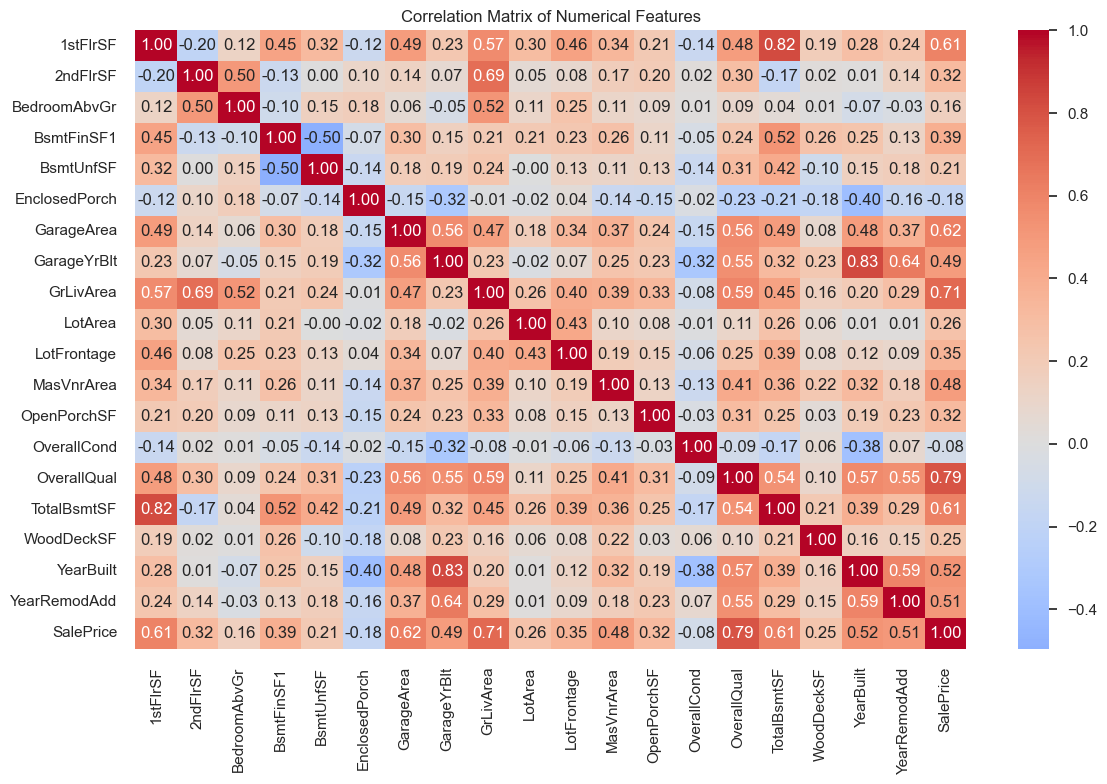

In [11]:
# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


In [12]:
# Get top correlated features with SalePrice
price_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("\nTop 10 features correlated with SalePrice:")
print(price_correlations.head(10))


Top 10 features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64


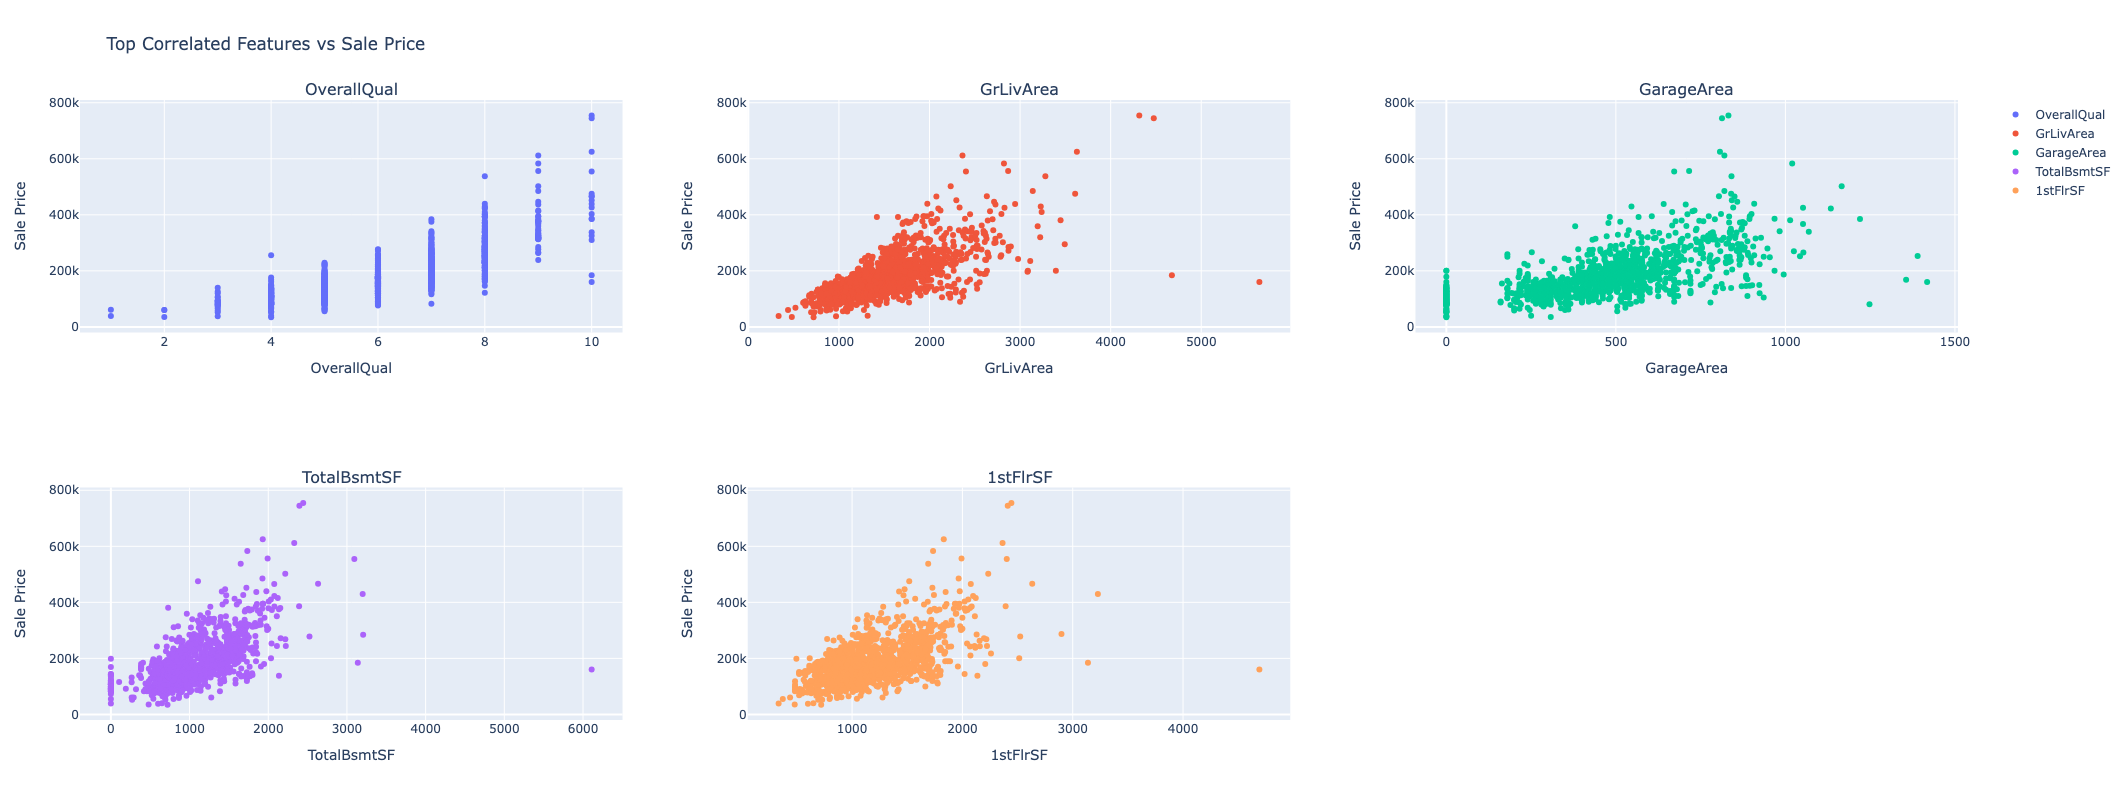

In [13]:
# Get top 5 correlated features
top_features = price_correlations.index[1:6]  # Exclude SalePrice itself

# Create scatter plots
fig = make_subplots(rows=2, cols=3, subplot_titles=top_features)

for i, feature in enumerate(top_features):
    row = i // 3 + 1
    col = i % 3 + 1
    
    fig.add_trace(
        go.Scatter(x=df[feature], y=df['SalePrice'], mode='markers', name=feature),
        row=row, col=col
    )
    
    fig.update_xaxes(title_text=feature, row=row, col=col)
    fig.update_yaxes(title_text='Sale Price', row=row, col=col)

fig.update_layout(height=800, width=1200, title_text="Top Correlated Features vs Sale Price")
fig.show()

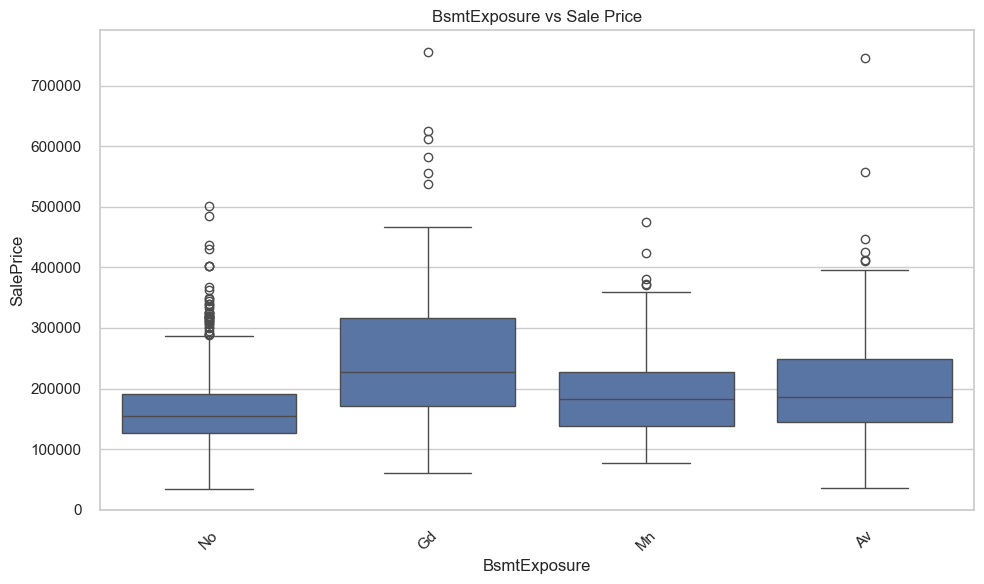

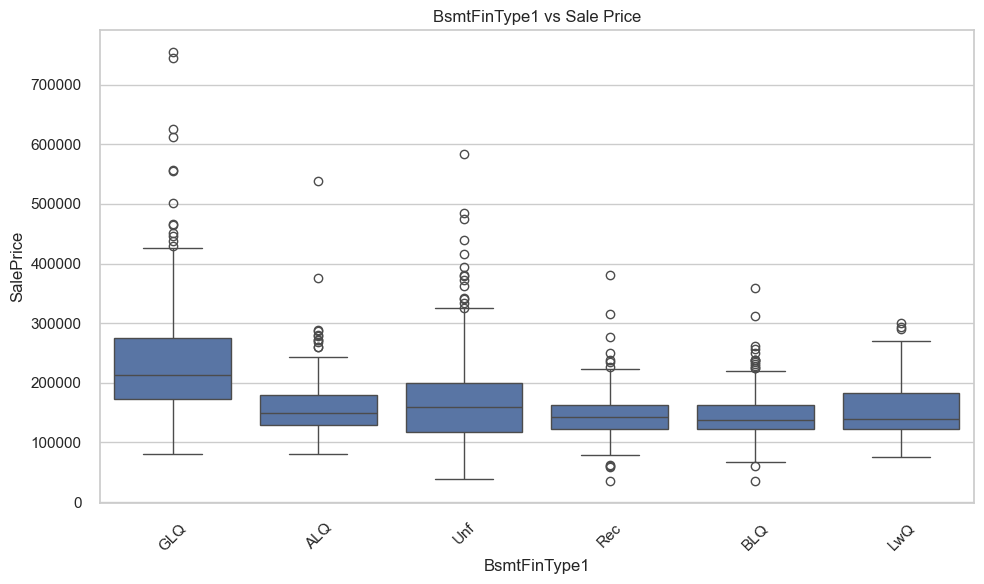

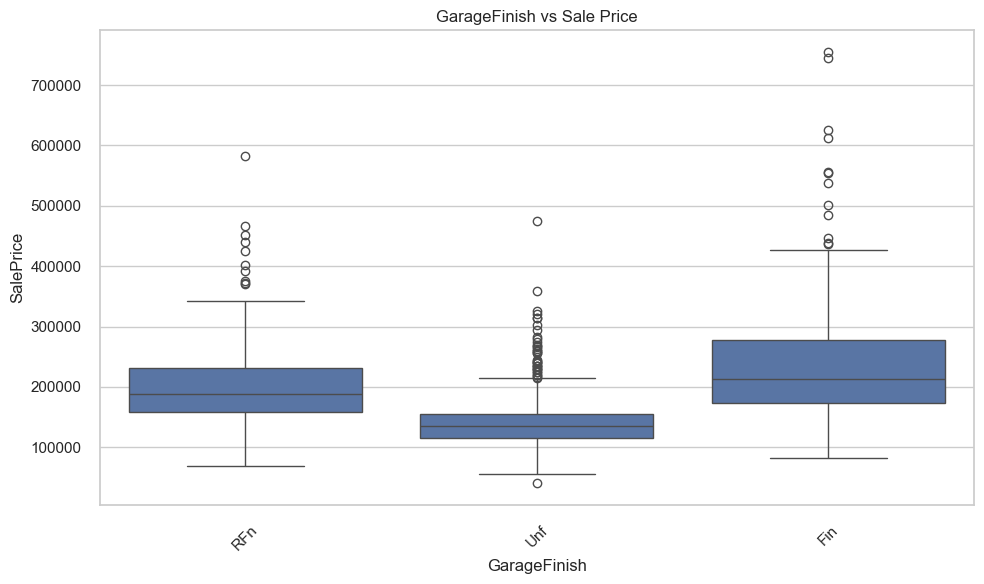

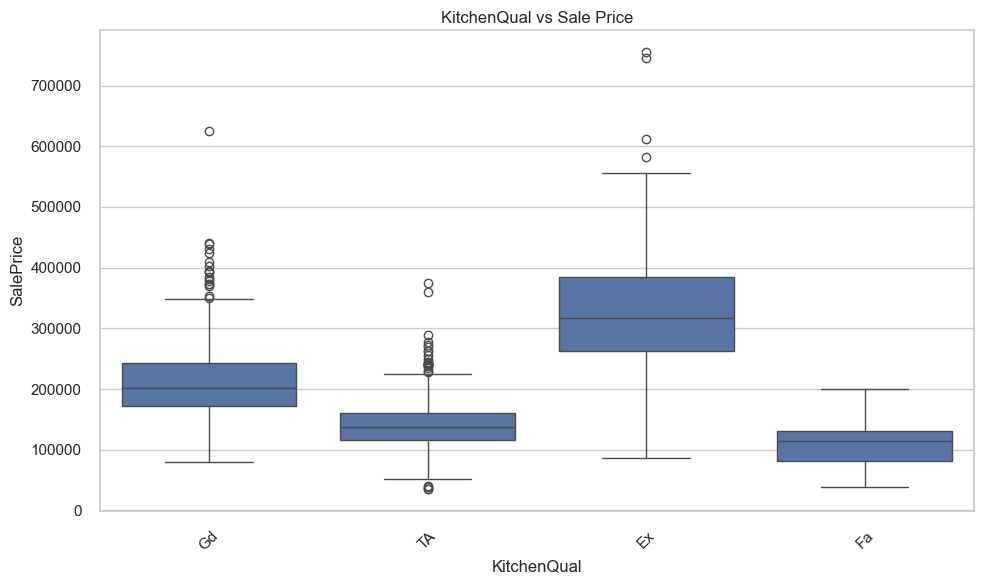

In [14]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create box plots for each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'{col} vs Sale Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

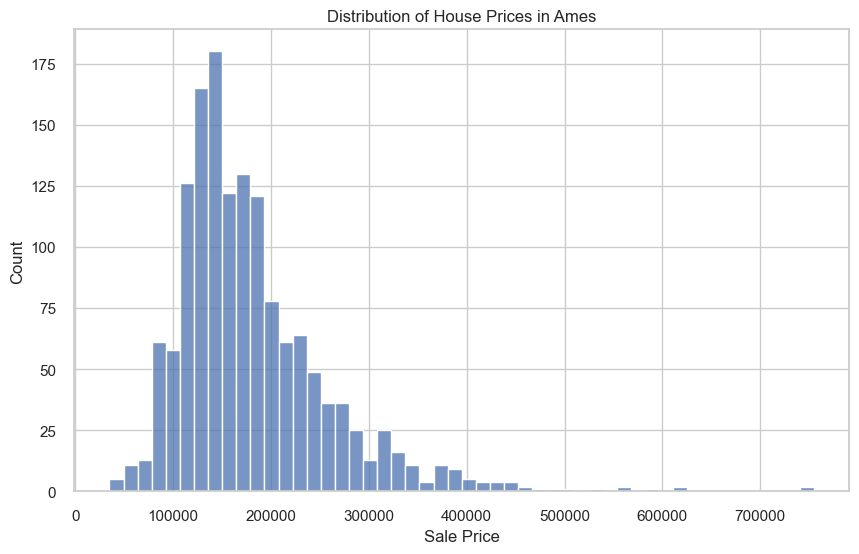


Price Summary Statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [15]:
# Create histogram of sale prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SalePrice', bins=50)
plt.title('Distribution of House Prices in Ames')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

# Print summary statistics
print("\nPrice Summary Statistics:")
print(df['SalePrice'].describe())